In [5]:
# Basic EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Model Preparation
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


# Model Building
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
#
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

# Model Performance
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

# Model Validation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [6]:
df=pd.read_csv(r'C:\Users\Dell\Desktop\GREAT LAKES\back to studies\capstone\Materials of part 1-EDA\newresult.csv')

In [7]:
df

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4,3,6,3,2,3,3,4,2,3,9,1,11,1,5,160,2
1,1,0,1,8,5,1,3,4,3,3,3,7,1,15,0,0,121,2
2,1,0,1,30,3,1,2,4,3,3,3,6,1,14,0,3,152,2
3,1,0,3,15,3,1,2,4,4,5,3,8,0,23,0,3,134,2
4,1,0,1,12,2,1,2,3,3,5,3,3,0,11,1,3,130,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,0,10,1,34,2,1,3,2,4,1,2,9,0,19,1,4,154,1
11256,0,13,1,19,2,1,3,5,1,5,2,7,0,16,1,8,227,2
11257,0,1,1,14,3,1,3,2,4,4,2,7,1,22,1,4,191,2
11258,0,23,3,11,2,1,4,5,4,4,2,7,0,16,2,9,180,1


In [8]:
#Feature Encoding

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Churn                    11260 non-null  int64
 1   Tenure                   11260 non-null  int64
 2   City_Tier                11260 non-null  int64
 3   CC_Contacted_LY          11260 non-null  int64
 4   Payment                  11260 non-null  int64
 5   Gender                   11260 non-null  int64
 6   Service_Score            11260 non-null  int64
 7   Account_user_count       11260 non-null  int64
 8   account_segment          11260 non-null  int64
 9   CC_Agent_Score           11260 non-null  int64
 10  Marital_Status           11260 non-null  int64
 11  rev_per_month            11260 non-null  int64
 12  Complain_ly              11260 non-null  int64
 13  rev_growth_yoy           11260 non-null  int64
 14  coupon_used_for_payment  11260 non-null  int64
 15  Da

In [10]:
df.Churn.value_counts(normalize=True)
#SMOTE

0    0.831616
1    0.168384
Name: Churn, dtype: float64

In [11]:
df.shape

(11260, 18)

In [12]:
X = df.drop("Churn", axis=1)
Y = df.pop("Churn")

In [15]:
print('X',X.shape)
print('Y',Y.shape)

X (11260, 17)
Y (11260,)


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

In [17]:
print('X_train',X_train.shape)
print('x_test',X_test.shape)

X_train (7882, 17)
x_test (3378, 17)


In [18]:
print('y_train',Y_train.shape)
print('y_test',Y_test.shape)

y_train (7882,)
y_test (3378,)


from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train, y_train)
X_train = pd.DataFrame(X_train_oversampled, columns=X_train.columns)

In [19]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, Y = smote.fit_resample(X, Y)
df = pd.concat([pd.DataFrame(X), pd.DataFrame(Y)], axis=1)

In [20]:
print('X_train',X_train.shape)
print('x_test',X_test.shape)

X_train (7882, 17)
x_test (3378, 17)


In [21]:
print('y_train',Y_train.shape)
print('y_test',Y_test.shape)

y_train (7882,)
y_test (3378,)


# 1)Checking Multicollinearity & VIF

In [22]:
#VIF Dataframe
vif_df = pd.DataFrame()
vif_df["feature"] = X_train.columns

In [23]:
# Calculate VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(X_train.values,i)
for i in range(len(X_train.columns))]
print(vif_df)

                    feature        VIF
0                    Tenure   1.776801
1                 City_Tier   4.504008
2           CC_Contacted_LY   4.860111
3                   Payment   8.518310
4                    Gender   8.682100
5             Service_Score  18.720062
6        Account_user_count  15.770549
7           account_segment   8.392721
8            CC_Agent_Score   5.675317
9            Marital_Status  10.530837
10            rev_per_month   1.269941
11              Complain_ly   1.376529
12           rev_growth_yoy  16.925422
13  coupon_used_for_payment   2.167333
14     Day_Since_CC_connect   3.005858
15                 cashback   2.302822
16             Login_device  13.818846


In [24]:
X_train = X_train.drop(["Login_device","Service_Score","Account_user_count","cashback","rev_growth_yoy"], axis=1)
X_test = X_test.drop(["Login_device","Service_Score","Account_user_count","cashback","rev_growth_yoy"], axis=1)

In [25]:
# Dropping and cecking the VIF Score

In [26]:
#VIF Dataframe
vif_df = pd.DataFrame()
vif_df["feature"] = X_train.columns
#
# Calculate VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(X_train.values,i)
                        for i in range(len(X_train.columns))]
print(vif_df)

                    feature       VIF
0                    Tenure  1.749735
1                 City_Tier  4.459016
2           CC_Contacted_LY  4.561752
3                   Payment  7.915305
4                    Gender  7.929075
5           account_segment  7.807819
6            CC_Agent_Score  5.297435
7            Marital_Status  8.887355
8             rev_per_month  1.264278
9               Complain_ly  1.368628
10  coupon_used_for_payment  2.080374
11     Day_Since_CC_connect  2.950217


In [27]:
#Significant Features
print('Y_train',Y_train.shape)
print('Y_test',Y_test.shape)

Y_train (7882,)
Y_test (3378,)


In [28]:

# Standard Scaler - Normality assuption
# MinMax - everywhere else

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
X_train = std_scale.fit_transform(X_train)
X_test = std_scale.transform(X_test)

In [166]:
#Model Building

In [167]:
#1. Decision Tree

In [168]:
dtcl = DecisionTreeClassifier(random_state=1)
#dtcl.fit(X_train, Y_train)

In [169]:
param_grid_dt = {
    'criterion': ['gini'],
    'max_depth': [10],
    'min_samples_leaf': [10], 
    'min_samples_split': [50],
}
gs_dtcl = GridSearchCV(dtcl, param_grid_dt, cv = 5, n_jobs = -1, verbose = 1)
gs_dtcl.fit(X_train, Y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [10],
                         'min_samples_leaf': [10], 'min_samples_split': [50]},
             verbose=1)

In [170]:
#2. (a) Model Prediction

In [171]:
gs_dtcl.fit(X_train, Y_train)
print(gs_dtcl.best_params_)
best_grid = gs_dtcl.best_estimator_
best_grid
#{'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 50, 'min_samples_split': 450}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 50}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=50,
                       random_state=1)

In [172]:

ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [173]:

ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,1.0000,0.0000
1,1.0000,0.0000
2,1.0000,0.0000
3,1.0000,0.0000
4,0.8125,0.1875


In [174]:
#2. (b) Model Performance

In [175]:
confusion_matrix(Y_train, ytrain_predict)

array([[6273,  282],
       [ 335,  992]], dtype=int64)

In [176]:
confusion_matrix(Y_test, ytest_predict)

array([[2637,  172],
       [ 173,  396]], dtype=int64)

In [177]:
cart_train_acc=best_grid.score(X_train,Y_train) 
cart_train_acc

0.9217203755392033

In [178]:
cart_test_acc=best_grid.score(X_test,Y_test)
cart_test_acc

0.8978685612788633

In [179]:
print(classification_report(Y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      6555
           1       0.78      0.75      0.76      1327

    accuracy                           0.92      7882
   macro avg       0.86      0.85      0.86      7882
weighted avg       0.92      0.92      0.92      7882



In [180]:
print(classification_report(Y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2809
           1       0.70      0.70      0.70       569

    accuracy                           0.90      3378
   macro avg       0.82      0.82      0.82      3378
weighted avg       0.90      0.90      0.90      3378



In [181]:
#2. (c) ROC-AUC Graph

AUC: 0.958


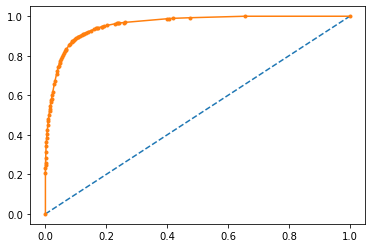

In [182]:
# AUC and ROC for the training data

# predict probabilities
probs = gs_dtcl.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
cart_train_auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % cart_train_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr, marker='.')

# show the plot
plt.show()


AUC: 0.937


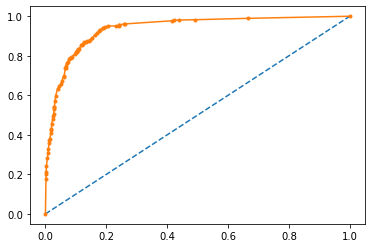

In [183]:
# AUC and ROC for the test data

# predict probabilities
probs = gs_dtcl.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
cart_test_auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % cart_test_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
cart_test_fpr, cart_test_tpr, cart_test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr, marker='.')

# show the plot
plt.show()

In [184]:
#2. (d) Model Performance Metrices

In [185]:
cart_metrics=classification_report(Y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.78
cart_train_recall  0.75
cart_train_f1  0.76


In [186]:
cart_metrics=classification_report(Y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.7
cart_test_recall  0.7
cart_test_f1  0.7


In [187]:
#2. (e) Feature Importance

In [188]:
#2. Logistic Regression

In [189]:
model = LogisticRegression(C=1.0, 
                           class_weight=None, 
                           dual=False, 
                           fit_intercept=True,
                           intercept_scaling=1, 
                           l1_ratio=None, 
                           max_iter=100,
                           n_jobs=None, 
                           penalty='l2',
                           random_state=1, 
                           solver='liblinear', 
                           tol=0.0001, 
                           verbose=0,
                           warm_start=False)
model.fit(X_train, Y_train) 

LogisticRegression(random_state=1, solver='liblinear')

In [190]:
#1. (a) Model Prediction

In [191]:
y_predict_train = model.predict(X_train)
log_train_acc = model.score(X_train, Y_train)
log_train_acc

0.8717330626744481

In [192]:
y_predict_test = model.predict(X_test)
log_test_acc = model.score(X_test, Y_test)
log_test_acc

0.8735938425103612

In [193]:
model.intercept_

array([-2.39297744])

In [194]:
model.coef_

array([[-1.62416181,  0.24195607,  0.23827713, -0.08715787, -0.14056275,
        -0.33556667,  0.37268993,  0.39818919,  0.10791843,  0.65558811,
         0.25957133, -0.43179447]])

In [195]:
#1. (b) Model Performance


In [196]:
confusion_matrix(Y_train, y_predict_train)

array([[6404,  151],
       [ 860,  467]], dtype=int64)

In [197]:
confusion_matrix(Y_test, y_predict_test)

array([[2748,   61],
       [ 366,  203]], dtype=int64)

In [198]:
print(classification_report(Y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      6555
           1       0.76      0.35      0.48      1327

    accuracy                           0.87      7882
   macro avg       0.82      0.66      0.70      7882
weighted avg       0.86      0.87      0.85      7882



In [199]:
print(classification_report(Y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2809
           1       0.77      0.36      0.49       569

    accuracy                           0.87      3378
   macro avg       0.83      0.67      0.71      3378
weighted avg       0.86      0.87      0.85      3378



In [200]:
#1. (c) ROC-AUC Graph

AUC: 0.854


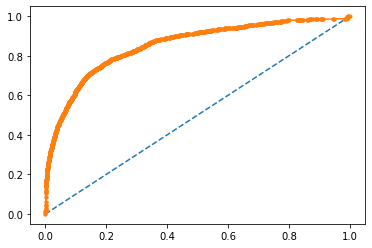

In [201]:
# AUC and ROC for the training data

# predict probabilities
probs = model.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_train_auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % log_train_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_train_fpr, log_train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_train_fpr, log_train_tpr, marker='.')

# show the plot
plt.show()

AUC: 0.851


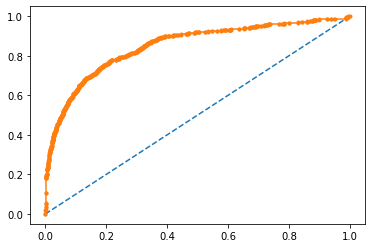

In [202]:

# AUC and ROC for the test data

# predict probabilities
probs = model.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_test_auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % log_test_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_test_fpr, log_test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_test_fpr, log_test_tpr, marker='.')

# show the plot
plt.show()

In [203]:
#1. (d) Model Performance Metrice

In [204]:
log_metrics=classification_report(Y_train, y_predict_train,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_train_precision=round(df.loc["1"][0],2)
log_train_recall=round(df.loc["1"][1],2)
log_train_f1=round(df.loc["1"][2],2)
print ('log_train_precision ',log_train_precision)
print ('log_train_recall ',log_train_recall)
print ('log_train_f1 ',log_train_f1)

log_train_precision  0.76
log_train_recall  0.35
log_train_f1  0.48


In [205]:
log_metrics=classification_report(Y_test, y_predict_test,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_test_precision=round(df.loc["1"][0],2)
log_test_recall=round(df.loc["1"][1],2)
log_test_f1=round(df.loc["1"][2],2)
print ('log_test_precision ',log_test_precision)
print ('log_test_recall ',log_test_recall)
print ('log_test_f1 ',log_test_f1)

log_test_precision  0.77
log_test_recall  0.36
log_test_f1  0.49


In [206]:
#3. Random Forest

In [207]:
param_grid = {
    'max_depth': [10],## 20,30,40
    'max_features': [11],## 7,8,9
    'min_samples_leaf': [10],## 50,100
    'min_samples_split': [50], ## 60,70
    'n_estimators': [100] ## 100,200
}
rfcl = RandomForestClassifier(random_state=1)
grid_search_rf = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [208]:
grid_search_rf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10], 'max_features': [11],
                         'min_samples_leaf': [10], 'min_samples_split': [50],
                         'n_estimators': [100]})

In [209]:
grid_search_rf.best_params_

{'max_depth': 10,
 'max_features': 11,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 100}

In [210]:
best_grid_rf = grid_search_rf.best_estimator_
best_grid_rf

RandomForestClassifier(max_depth=10, max_features=11, min_samples_leaf=10,
                       min_samples_split=50, random_state=1)

In [211]:
# To understand the differences of different random states affecting Out-of-Bag score
random_state=[0,30,64]
for i in random_state:
    rfcl=RandomForestClassifier(random_state=i,oob_score=True)
    rfcl.fit(X_train,Y_train)
    print(rfcl.oob_score_)

0.958893681806648
0.9604161380360314
0.9624460796752093


In [212]:
rfcl=RandomForestClassifier(n_estimators=500,random_state=1,oob_score=True,n_jobs=-1)
rfcl=rfcl.fit(X_train,Y_train)
rfcl.oob_score

True

In [213]:
rfcl=rfcl.fit(X_test,Y_test)
rfcl.oob_score_

0.9393132030787448

In [214]:
#3. (a) Model Prediction

In [215]:
ytrain_predict = best_grid_rf.predict(X_train)
ytest_predict = best_grid_rf.predict(X_test)
ytrain_predict_prob=best_grid_rf.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.967217,0.032783
1,0.993972,0.006028
2,0.941780,0.058220
3,0.971443,0.028557
4,0.903937,0.096063


In [216]:
ytest_predict_prob=best_grid_rf.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.996238,0.003762
1,0.985541,0.014459
2,0.857600,0.142400
3,0.967239,0.032761
4,0.863157,0.136843


In [217]:
#3. (b) Model Performance

In [218]:
confusion_matrix(Y_train,ytrain_predict)

array([[6362,  193],
       [ 417,  910]], dtype=int64)

In [219]:
confusion_matrix(Y_test, ytest_predict)

array([[2715,   94],
       [ 213,  356]], dtype=int64)

In [220]:
rf_train_acc=best_grid.score(X_train,Y_train) 
rf_train_acc

0.9217203755392033

In [221]:
rf_test_acc=best_grid.score(X_test,Y_test)
rf_test_acc

0.8978685612788633

In [222]:
print(classification_report(Y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6555
           1       0.83      0.69      0.75      1327

    accuracy                           0.92      7882
   macro avg       0.88      0.83      0.85      7882
weighted avg       0.92      0.92      0.92      7882



In [223]:
print(classification_report(Y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2809
           1       0.79      0.63      0.70       569

    accuracy                           0.91      3378
   macro avg       0.86      0.80      0.82      3378
weighted avg       0.90      0.91      0.90      3378



In [224]:
#3. (c) ROC-AUC Graph

Area under Curve is 0.9579587709813835


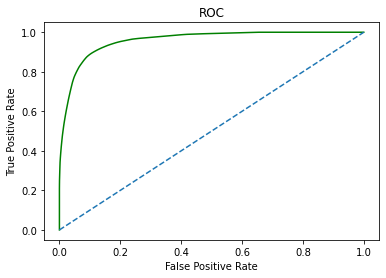

In [225]:
rf_train_fpr, rf_train_tpr,_=roc_curve(Y_train,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(Y_train,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

Area under Curve is 0.937005144773797


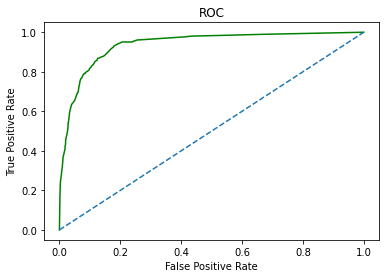

In [226]:
rf_test_fpr, rf_test_tpr,_=roc_curve(Y_test,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(Y_test,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [227]:
#3. (d) Model Performance Metrices

In [228]:
rf_metrics=classification_report(Y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.83
rf_train_recall  0.69
rf_train_f1  0.75


In [229]:
rf_metrics=classification_report(Y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.79
rf_test_recall  0.63
rf_test_f1  0.7


In [230]:
#3.(e) Feature Importance

In [231]:
rf_imp = pd.DataFrame(best_grid_rf.feature_importances_, columns = ["Imp"], 
                      index = X_train.columns).sort_values('Imp',ascending=False)
print(rf_imp)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [232]:
#4. Linear Discriminant Analysis

In [233]:
clf = LinearDiscriminantAnalysis(solver='eigen',shrinkage = 'auto',)
model=clf.fit(X_train,Y_train)
model

LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen')

In [234]:
#4. (a) Model Prediction

In [235]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)
pred_class_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [236]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [237]:
#4. (b) Model Performance

In [238]:
confusion_matrix(Y_train, pred_class_train)

array([[6430,  125],
       [ 969,  358]], dtype=int64)

In [239]:
confusion_matrix(Y_test, pred_class_test)

array([[2754,   55],
       [ 400,  169]], dtype=int64)

In [240]:
lda_train_acc = model.score(X_train,Y_train)
lda_train_acc

0.8612027404212129

In [241]:
lda_test_acc = model.score(X_test,Y_test)
lda_test_acc

0.8653049141503848

In [242]:
print(classification_report(Y_train, pred_class_train))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      6555
           1       0.74      0.27      0.40      1327

    accuracy                           0.86      7882
   macro avg       0.81      0.63      0.66      7882
weighted avg       0.85      0.86      0.83      7882



In [243]:
print(classification_report(Y_test, pred_class_test))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2809
           1       0.75      0.30      0.43       569

    accuracy                           0.87      3378
   macro avg       0.81      0.64      0.67      3378
weighted avg       0.85      0.87      0.84      3378



In [244]:
#4. (c) ROC-AUC Graph

AUC: 0.958


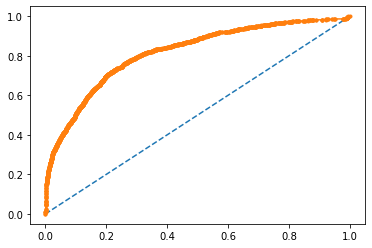

In [245]:
# AUC and ROC for the training data

# predict probabilities
probs = model.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
lda_train_auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % cart_train_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr, marker='.')

# show the plot
plt.show()

AUC: 0.937


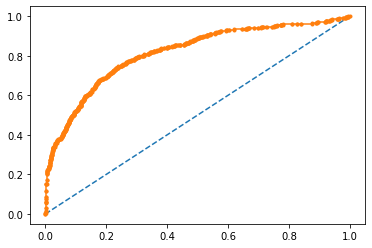

In [246]:
# AUC and ROC for the test data

# predict probabilities
probs = model.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
lda_test_auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % cart_test_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr, marker='.')

# show the plot
plt.show()

In [247]:
#4. (d) Model Performance Metrices

In [248]:
lda_metrics=classification_report(Y_train, pred_class_train,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.74
lda_train_recall  0.27
lda_train_f1  0.4


In [249]:
lda_metrics=classification_report(Y_test, pred_class_test,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["0"][2],2)
lda_test_recall=round(df.loc["0"][1],2)
lda_test_precision=round(df.loc["0"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.87
lda_test_recall  0.98
lda_test_f1  0.92


In [250]:
#5. K Nearest Neighbours

In [251]:
KNN_model=KNeighborsClassifier(n_neighbors = 15,
                              weights = 'uniform',
                              metric = 'minkowski')
KNN_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=15)

In [252]:
#5. (a) Model Prediction

In [253]:
KNN_train_predict = KNN_model.predict(X_train)
KNN_train_acc = KNN_model.score(X_train, Y_train)
KNN_train_acc

0.9168992641461557

In [254]:
KNN_test_predict = KNN_model.predict(X_test)
KNN_test_acc = KNN_model.score(X_test, Y_test)
KNN_test_acc

0.8972764949674363

In [255]:
#5. (b) Model Performance

In [256]:
confusion_matrix(Y_train, KNN_train_predict)

array([[6434,  121],
       [ 534,  793]], dtype=int64)

In [257]:
confusion_matrix(Y_test, KNN_test_predict)

array([[2734,   75],
       [ 272,  297]], dtype=int64)

In [258]:
print(classification_report(Y_train, KNN_train_predict))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      6555
           1       0.87      0.60      0.71      1327

    accuracy                           0.92      7882
   macro avg       0.90      0.79      0.83      7882
weighted avg       0.91      0.92      0.91      7882



In [259]:
print(classification_report(Y_test, KNN_test_predict))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2809
           1       0.80      0.52      0.63       569

    accuracy                           0.90      3378
   macro avg       0.85      0.75      0.79      3378
weighted avg       0.89      0.90      0.89      3378



In [260]:
#5. (c) ROC-AUC Graph

Area under Curve is 0.9655185356990327


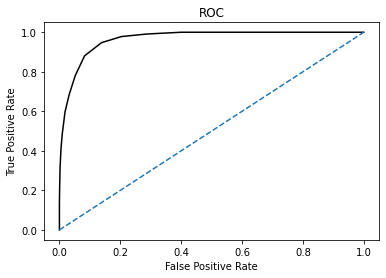

In [261]:
KNN_train_fpr, KNN_train_tpr,_=roc_curve(Y_train,KNN_model.predict_proba(X_train)[:,1])
plt.plot(KNN_train_fpr,KNN_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
KNN_train_auc=roc_auc_score(Y_train,KNN_model.predict_proba(X_train)[:,1])
print('Area under Curve is', KNN_train_auc)

Area under Curve is 0.9321447318780147


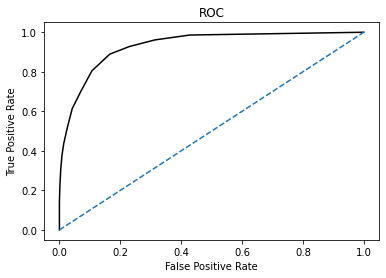

In [262]:
KNN_test_fpr, KNN_test_tpr,_=roc_curve(Y_test,KNN_model.predict_proba(X_test)[:,1])
plt.plot(KNN_test_fpr,KNN_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
KNN_test_auc=roc_auc_score(Y_test,KNN_model.predict_proba(X_test)[:,1])
print('Area under Curve is', KNN_test_auc)

In [263]:
#5. (d) Model Performance Metrices

In [264]:
KNN_metrics=classification_report(Y_train, KNN_train_predict,output_dict=True)
df=pd.DataFrame(KNN_metrics).transpose()
KNN_train_f1=round(df.loc["1"][2],2)
KNN_train_recall=round(df.loc["1"][1],2)
KNN_train_precision=round(df.loc["1"][0],2)
print ('KNN_train_precision ',KNN_train_precision)
print ('KNN_train_recall ',KNN_train_recall)
print ('KNN_train_f1 ',KNN_train_f1)

KNN_train_precision  0.87
KNN_train_recall  0.6
KNN_train_f1  0.71


In [265]:
KNN_metrics=classification_report(Y_test, KNN_test_predict,output_dict=True)
df=pd.DataFrame(KNN_metrics).transpose()
KNN_test_f1=round(df.loc["1"][2],2)
KNN_test_recall=round(df.loc["1"][1],2)
KNN_test_precision=round(df.loc["1"][0],2)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

KNN_test_precision  0.8
KNN_test_recall  0.52
KNN_test_f1  0.63


In [266]:
# empty list that will hold accuracy scores
ac_scores = []
#
# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, Y_test)
    ac_scores.append(scores)
#
# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.03463587921847244,
 0.043516873889875685,
 0.052397868561278815,
 0.06897572528123153,
 0.08318531675547658,
 0.09384251036116042,
 0.09621077560686797,
 0.10272350503256367,
 0.10627590290112487,
 0.10864416814683242]

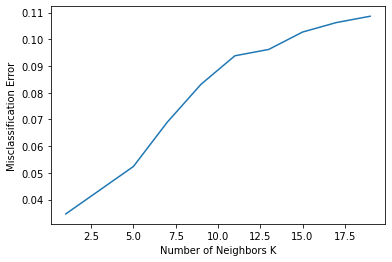

In [267]:
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [268]:
#6. Gaussian Naive Bayes

In [269]:
NB_model = GaussianNB()
NB_model.fit(X_train, Y_train)

GaussianNB()

In [270]:
#6. (a) Model Prediction

In [271]:
NB_train_predict = NB_model.predict(X_train)
NB_train_acc = NB_model.score(X_train, Y_train)   
NB_train_acc 

0.8605683836589698

In [272]:
NB_test_predict = NB_model.predict(X_test)
NB_test_acc = NB_model.score(X_test, Y_test)
NB_test_acc

0.8564239194789817

In [273]:
#6. (b) Model Performance

In [274]:
confusion_matrix(Y_train, NB_train_predict)

array([[6407,  148],
       [ 951,  376]], dtype=int64)

In [275]:
confusion_matrix(Y_test, NB_test_predict)

array([[2727,   82],
       [ 403,  166]], dtype=int64)

In [276]:
print(classification_report(Y_train, NB_train_predict))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      6555
           1       0.72      0.28      0.41      1327

    accuracy                           0.86      7882
   macro avg       0.79      0.63      0.66      7882
weighted avg       0.84      0.86      0.83      7882



In [277]:
print(classification_report(Y_test, NB_test_predict))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2809
           1       0.67      0.29      0.41       569

    accuracy                           0.86      3378
   macro avg       0.77      0.63      0.66      3378
weighted avg       0.84      0.86      0.83      3378



In [278]:
#6. (c) ROC-AUC Graph

Area under Curve is 0.8108912069170666


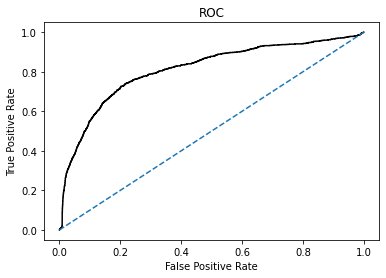

In [279]:
NB_train_fpr, NB_train_tpr,_=roc_curve(Y_train,NB_model.predict_proba(X_train)[:,1])
plt.plot(NB_train_fpr,NB_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
NB_train_auc=roc_auc_score(Y_train,NB_model.predict_proba(X_train)[:,1])
print('Area under Curve is', NB_train_auc)

Area under Curve is 0.8079384554166529


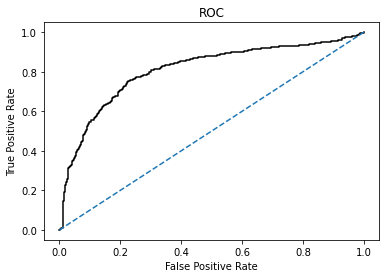

In [280]:
NB_test_fpr, NB_test_tpr,_=roc_curve(Y_test,NB_model.predict_proba(X_test)[:,1])
plt.plot(NB_test_fpr,NB_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
NB_test_auc=roc_auc_score(Y_test,NB_model.predict_proba(X_test)[:,1])
print('Area under Curve is', NB_test_auc)

In [281]:
#6. (d) Model Performance Metrices

In [282]:
NB_metrics=classification_report(Y_train, NB_train_predict,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
NB_train_f1=round(df.loc["1"][2],2)
NB_train_recall=round(df.loc["1"][1],2)
NB_train_precision=round(df.loc["1"][0],2)
print ('NB_train_precision ',NB_train_precision)
print ('NB_train_recall ',NB_train_recall)
print ('NB_train_f1 ',NB_train_f1)

NB_train_precision  0.72
NB_train_recall  0.28
NB_train_f1  0.41


In [283]:
NB_metrics=classification_report(Y_test, NB_test_predict,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
NB_test_f1=round(df.loc["1"][2],2)
NB_test_recall=round(df.loc["1"][1],2)
NB_test_precision=round(df.loc["1"][0],2)
print ('NB_test_precision ',NB_test_precision)
print ('NB_test_recall ',NB_test_recall)
print ('NB_test_f1 ',NB_test_f1)

NB_test_precision  0.67
NB_test_recall  0.29
NB_test_f1  0.41


In [284]:
#8 Bagging

In [285]:
#7. Gradient Boosting

In [286]:
from sklearn.ensemble import GradientBoostingClassifier
Gradient_model = GradientBoostingClassifier(random_state=1)
Gradient_model.fit(X_train,Y_train)

GradientBoostingClassifier(random_state=1)

In [287]:
gbcl_train_acc = Gradient_model.score(X_train,Y_train)
gbcl_train_acc

0.9118244100482111

In [288]:
gbcl_test_acc =  Gradient_model.score(X_test,Y_test)
gbcl_test_acc

0.9008288928359977

In [289]:
Y_train_predict7=Gradient_model.predict(X_train)
Gradient_model_score=Gradient_model.score(X_train,Y_train)
print(Gradient_model_score)
print(metrics.confusion_matrix(Y_train,Y_train_predict7))
print(metrics.classification_report(Y_train,Y_train_predict7))

0.9118244100482111
[[6365  190]
 [ 505  822]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6555
           1       0.81      0.62      0.70      1327

    accuracy                           0.91      7882
   macro avg       0.87      0.80      0.83      7882
weighted avg       0.91      0.91      0.91      7882



the auc curve 0.947 


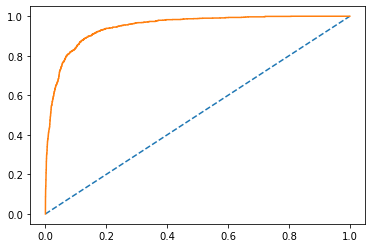

In [290]:
probs =Gradient_model.predict_proba(X_train)

probs =probs[:,1]

gbcl_train_auc=roc_auc_score(Y_train,probs)
print("the auc curve %.3f " % gbcl_train_auc)

gbcl_train_fpr,gbcl_train_tpr,train_threshold=roc_curve(Y_train,probs)
plt.plot([0,1],[0,1],linestyle='--')

plt.plot(gbcl_train_fpr,gbcl_train_tpr);



In [291]:

Y_test_predict_7=Gradient_model.predict(X_test)
Graident_model_score=Gradient_model.score(X_test,Y_test)
print(Gradient_model_score)
print(metrics.confusion_matrix(Y_test,Y_test_predict_7))
print(metrics.classification_report(Y_test,Y_test_predict_7))

0.9118244100482111
[[2712   97]
 [ 238  331]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2809
           1       0.77      0.58      0.66       569

    accuracy                           0.90      3378
   macro avg       0.85      0.77      0.80      3378
weighted avg       0.89      0.90      0.90      3378



the auc curve 0.937 


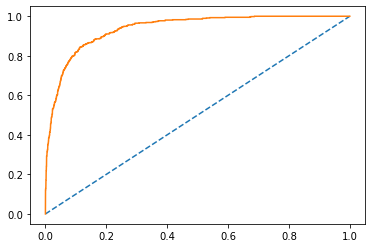

In [296]:
#AUC and Roc for test data

probs =Gradient_model.predict_proba(X_test)

probs =probs[:,1]

gbcl_test_auc=roc_auc_score(Y_test,probs)
print("the auc curve %.3f " % gbcl_test_auc)

gbcl_test_fpr,gbcl_test_tpr,test_threshold=roc_curve(Y_test,probs)
plt.plot([0,1],[0,1],linestyle='--')

plt.plot(gbcl_test_fpr, gbcl_test_tpr);



In [297]:
gbcl_metrics=classification_report(Y_train, Y_train_predict7,output_dict=True)
df=pd.DataFrame(gbcl_metrics).transpose()
gbcl_train_f1=round(df.loc["1"][2],2)
gbcl_train_recall=round(df.loc["1"][1],2)
gbcl_train_precision=round(df.loc["1"][0],2)
gbcl_train_acc=round(df.iloc[2][3],2)
print('Gradient_train_accuracy',gbcl_train_acc)
print ('gbcl_train_precision ',gbcl_train_precision)
print ('gbcl_train_recall ',gbcl_train_recall)
print ('gbcl_train_f1 ',gbcl_train_f1)


Gradient_train_accuracy 0.91
gbcl_train_precision  0.81
gbcl_train_recall  0.62
gbcl_train_f1  0.7


In [298]:
#print(metrics.classification_report(Y_test,Y_test_predict_7))
gbcl_metrics=classification_report(Y_test,Y_test_predict_7,output_dict=True)
df=pd.DataFrame(gbcl_metrics).transpose()
gbcl_test_f1=round(df.loc["1"][2],2)
gbcl_test_recall=round(df.loc["1"][1],2)
gbcl_test_precision=round(df.loc["1"][0],2)
print ('gbcl_test_precision ',gbcl_test_precision)
print ('gbcl_test_recall ',gbcl_test_recall)
print ('gbcl_test_f1 ',gbcl_test_f1)

gbcl_test_precision  0.77
gbcl_test_recall  0.58
gbcl_test_f1  0.66


In [299]:
##MLP Classifier (Artificial Neural Network)

In [300]:
param_grid = {
    'hidden_layer_sizes': [(100,100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
    'max_iter' : [10000]
}

mlp = MLPClassifier()

grid_search = GridSearchCV(estimator = mlp, param_grid = param_grid, cv = 3)

In [301]:
#ytrain_predict = mlp.predict(X_train)
#ytest_predict = mlp.predict(X_test)

grid_search.fit(X_train, Y_train)
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.01}

In [302]:
best_grid = grid_search.best_estimator_
ann_train_predict_prob=best_grid.predict_proba(X_train)
pd.DataFrame(ann_train_predict_prob).head()

,0,1
0,0.999278,7.223523e-04
1,1.000000,3.665044e-07
2,0.961948,3.805188e-02
3,0.993532,6.467544e-03
4,0.999565,4.352552e-04


In [303]:
ann_test_predict_prob=best_grid.predict_proba(X_test)
pd.DataFrame(ann_test_predict_prob).head()

,0,1
0,0.999985,0.000015
1,0.999916,0.000084
2,0.998066,0.001934
3,0.999978,0.000022
4,0.999020,0.000980


In [304]:

ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [305]:
#Model performance

In [306]:
ann_train_acc = best_grid.score(X_train,Y_train)
ann_train_acc


0.9812230398376046

In [307]:
ann_test_acc = best_grid.score(X_test,Y_test)
ann_test_acc


0.9493783303730018

In [308]:

print(classification_report(Y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6555
           1       0.94      0.95      0.94      1327

    accuracy                           0.98      7882
   macro avg       0.97      0.97      0.97      7882
weighted avg       0.98      0.98      0.98      7882



In [309]:
print(classification_report(Y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2809
           1       0.87      0.82      0.85       569

    accuracy                           0.95      3378
   macro avg       0.92      0.90      0.91      3378
weighted avg       0.95      0.95      0.95      3378



In [310]:
confusion_matrix(Y_train, ytrain_predict) 

array([[6479,   76],
       [  72, 1255]], dtype=int64)

In [311]:
confusion_matrix(Y_test, ytest_predict)

array([[2740,   69],
       [ 102,  467]], dtype=int64)

In [312]:
#ROC-AUC Graph train

AUC: 0.997


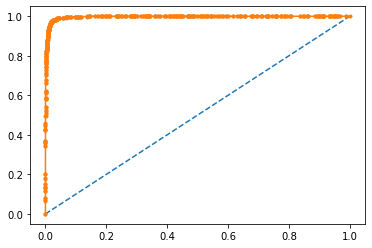

In [313]:
# AUC and ROC for the training data

# predict probabilities
probs =best_grid.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
ann_train_auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % ann_train_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
ann_train_fpr, ann_train_tpr, ann_train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(ann_train_fpr, ann_train_tpr, marker='.')

# show the plot
plt.show()

AUC: 0.973


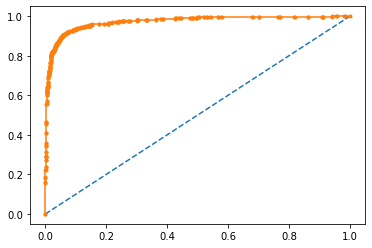

In [314]:
# AUC and ROC for the testing data

# predict probabilities
probs =best_grid.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
ann_test_auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % ann_test_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
ann_test_fpr, ann_test_tpr, ann_test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(ann_test_fpr, ann_test_tpr, marker='.')

# show the plot
plt.show()

In [315]:
# Model Performance Metrices

In [316]:
ann_metrics=classification_report(Y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(ann_metrics).transpose()
ann_train_f1=round(df.loc["1"][2],2)
ann_train_recall=round(df.loc["1"][1],2)
ann_train_precision=round(df.loc["1"][0],2)
print ('ann_train_precision ',ann_train_precision)
print ('ann_train_recall ',ann_train_recall)
print ('ann_train_f1 ',ann_train_f1)

ann_train_precision  0.94
ann_train_recall  0.95
ann_train_f1  0.94


In [317]:
ann_metrics=classification_report(Y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(ann_metrics).transpose()
ann_test_f1=round(df.loc["1"][2],2)
ann_test_recall=round(df.loc["1"][1],2)
ann_test_precision=round(df.loc["1"][0],2)
print ('ann_test_precision ',ann_test_precision)
print ('ann_test_recall ',ann_test_recall)
print ('ann_test_f1 ',ann_test_f1)

ann_test_precision  0.87
ann_test_recall  0.82
ann_test_f1  0.85


In [318]:
#Model Performance Comparison

In [319]:
#1. Performance Matrics - on Train Data

In [320]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({
       'CART train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
       'RF Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
       'Log Train':[log_train_acc,log_train_auc,log_train_recall,log_train_precision,log_train_f1],          
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
       'KNN Train':[KNN_train_acc,KNN_train_auc,KNN_train_recall,KNN_train_precision,KNN_train_f1], 
       'NB Train':[NB_train_acc,NB_train_auc,NB_train_recall,NB_train_precision,NB_train_f1],
       'ANN train':[ann_train_acc,ann_train_auc,ann_train_recall,ann_train_precision,ann_train_f1],
       'Gr.Boost Train':[gbcl_train_acc,gbcl_train_auc,gbcl_train_recall,gbcl_train_precision,gbcl_train_f1]},index=index)
round(data,2)

,CART train,RF Train,Log Train,LDA Train,KNN Train,NB Train,ANN train,Gr.Boost Train
Accuracy,0.92,0.92,0.87,0.86,0.92,0.86,0.98,0.91
AUC,0.96,0.96,0.85,0.82,0.97,0.81,1.00,0.95
Recall,0.75,0.69,0.35,0.27,0.60,0.28,0.95,0.62
Precision,0.78,0.83,0.76,0.74,0.87,0.72,0.94,0.81
F1 Score,0.76,0.75,0.48,0.40,0.71,0.41,0.94,0.70


In [321]:
#2. Performance Matrics - on Test Data

In [322]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({
       'CART test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'RF test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],  
       'Log Test':[log_test_acc,log_test_auc,log_test_recall,log_test_precision,log_test_f1],
       'LDA test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
       'KNN test':[KNN_test_acc,KNN_test_auc,KNN_test_recall,KNN_test_precision,KNN_test_f1], 
       'NB test':[NB_test_acc,NB_test_auc,NB_test_recall,NB_test_precision,NB_test_f1],
       'ANN test':[ann_test_acc,ann_test_auc,ann_test_recall,ann_test_precision,ann_test_f1],
       'Gr.Boost test':[gbcl_test_acc,gbcl_test_auc,gbcl_test_recall,gbcl_test_precision,gbcl_test_f1]},index=index)
round(data,2)

,CART test,RF test,Log Test,LDA test,KNN test,NB test,ANN test,Gr.Boost test
Accuracy,0.90,0.90,0.87,0.87,0.90,0.86,0.95,0.90
AUC,0.94,0.94,0.85,0.82,0.93,0.81,0.97,0.94
Recall,0.70,0.63,0.36,0.98,0.52,0.29,0.82,0.58
Precision,0.70,0.79,0.77,0.87,0.80,0.67,0.87,0.77
F1 Score,0.70,0.70,0.49,0.92,0.63,0.41,0.85,0.66


In [323]:
#3. ROC-AUC - on Train Data

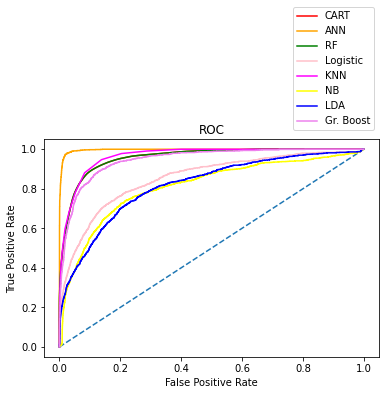

In [324]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(ann_train_fpr, ann_train_tpr,color='orange',label="ANN")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(log_train_fpr,log_train_tpr,color='Pink',label="Logistic")
plt.plot(KNN_train_fpr,KNN_train_tpr,color='magenta',label="KNN")
plt.plot(NB_train_fpr,NB_train_tpr,color='yellow',label="NB")
plt.plot(lda_train_fpr,lda_train_tpr,color='blue',label="LDA")
plt.plot(gbcl_train_fpr,gbcl_train_tpr,color='violet',label="Gr. Boost")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [325]:
#4. ROC-AUC - on Test Data

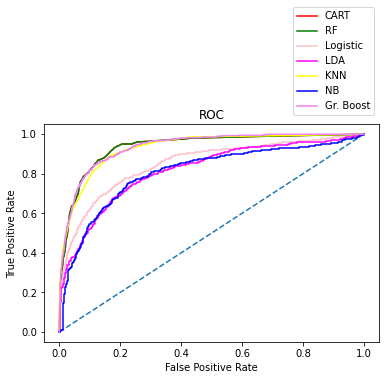

In [326]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(log_test_fpr,log_test_tpr,color='pink',label="Logistic")
plt.plot(lda_test_fpr,lda_test_tpr,color='magenta',label="LDA")
plt.plot(KNN_test_fpr,KNN_test_tpr,color='yellow',label="KNN")
plt.plot(NB_test_fpr,NB_test_tpr,color='blue',label="NB")
plt.plot(gbcl_test_fpr,gbcl_test_tpr,color='violet',label="Gr. Boost")
#plt.plot(xgb_test_fpr,xgb_test_tpr,color='black',label="XG Boost")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [ ]:
# Ensembling -Bagging

In [46]:

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [57]:

# Training Data Probability Prediction
pred_prob_train = Bagging_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = Bagging_model.predict_proba(X_test)

In [47]:

## Performance Matrix on train data set
Y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train, Y_train_predict))
print(metrics.classification_report(Y_train, Y_train_predict))

0.9996193859426542
[[6554    1]
 [   2 1325]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [48]:

## Performance Matrix on test data set
Y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))

0.9683244523386619
[[2767   42]
 [  65  504]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2809
           1       0.92      0.89      0.90       569

    accuracy                           0.97      3378
   macro avg       0.95      0.94      0.94      3378
weighted avg       0.97      0.97      0.97      3378



In [65]:
enasable_bagg_train_acc=Bagging_model.score(X_train,Y_train) 
enasable_bagg_train_acc

0.9996193859426542

In [66]:
ensamble_bagg_test_acc=Bagging_model.score(X_test,Y_test) 
ensamble_bagg_test_acc

0.9683244523386619

In [59]:
# Ensembling -Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=1)

In [63]:

## Performance Matrix on train data set
Y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train, Y_train_predict))
print(metrics.classification_report(Y_train, Y_train_predict))

0.9996193859426542
[[6554    1]
 [   2 1325]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [64]:

## Performance Matrix on test data set
Y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))

0.9662522202486679
[[2777   32]
 [  82  487]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2809
           1       0.94      0.86      0.90       569

    accuracy                           0.97      3378
   macro avg       0.95      0.92      0.94      3378
weighted avg       0.97      0.97      0.97      3378



In [68]:
enasable_rf_train_acc=RF_model.score(X_train,Y_train) 
enasable_rf_train_acc

0.9996193859426542

In [69]:
enasable_rf_test_acc=RF_model.score(X_test,Y_test) 
enasable_rf_test_acc

0.9662522202486679